In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r"D:\Udemy Deep Learning\TensorFlow_FILES\DATA\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

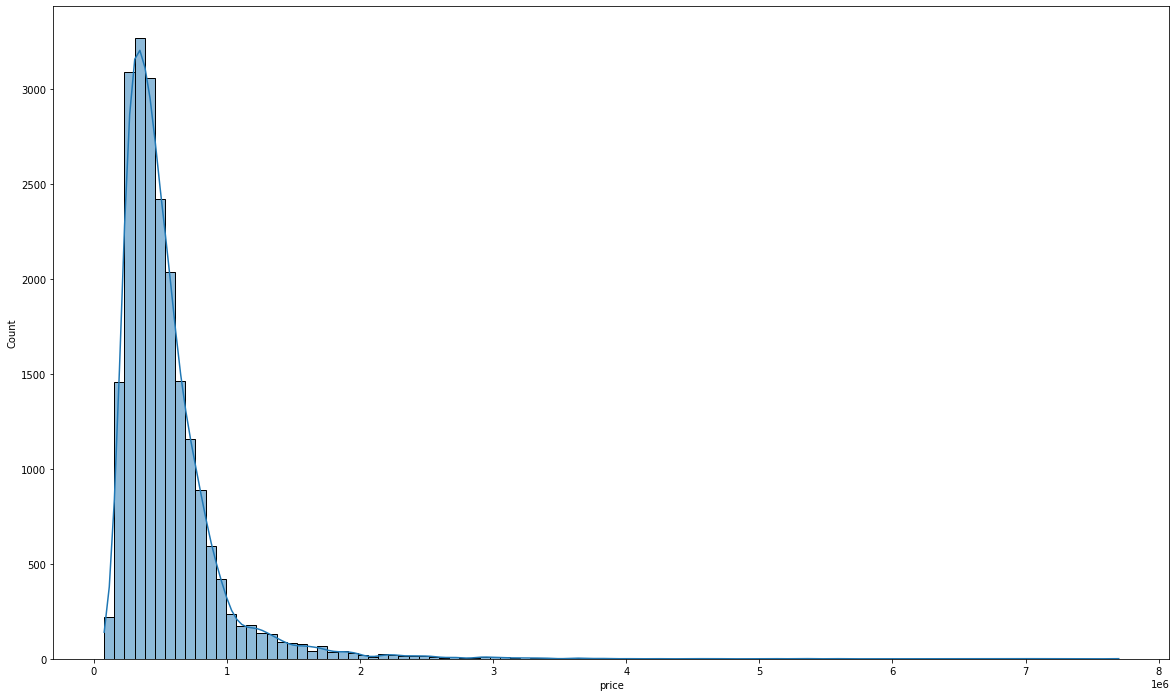

In [18]:
plt.figure(figsize=(20,12))
sns.histplot(df['price'],bins=100,kde=True)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

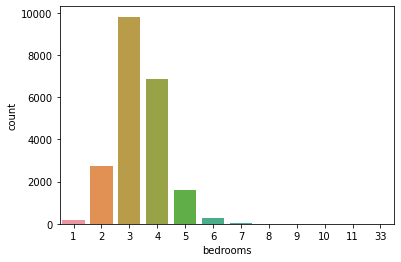

In [20]:
sns.countplot(x='bedrooms',data=df)

In [22]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [23]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [27]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

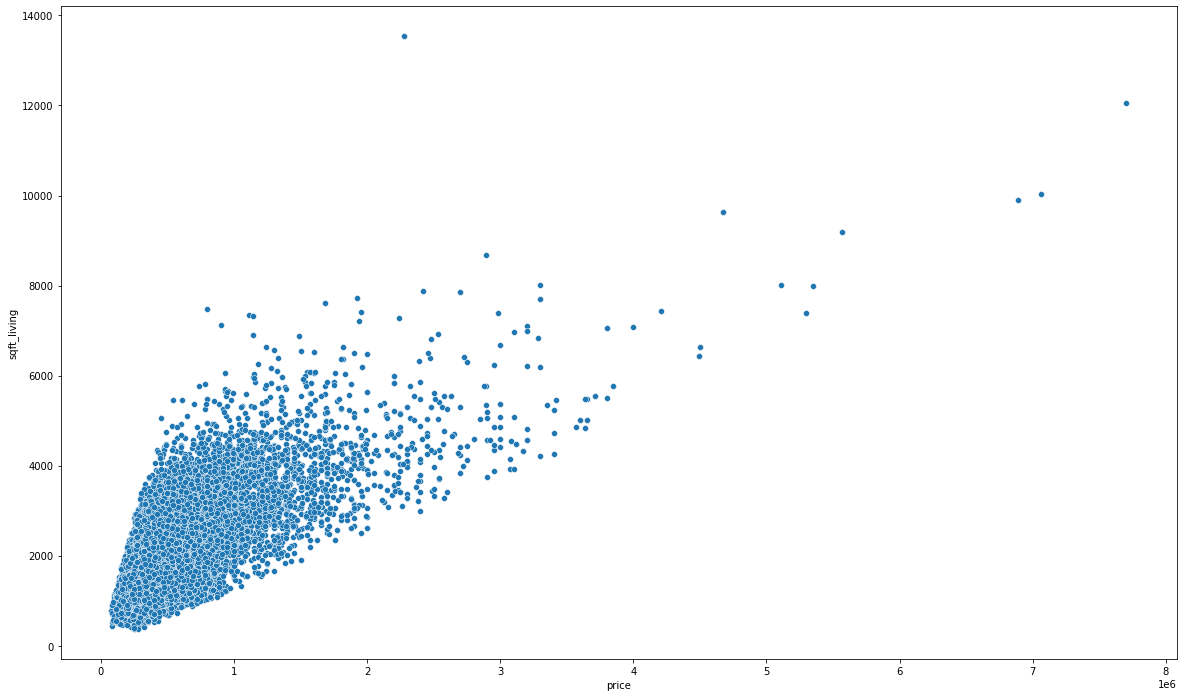

In [29]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

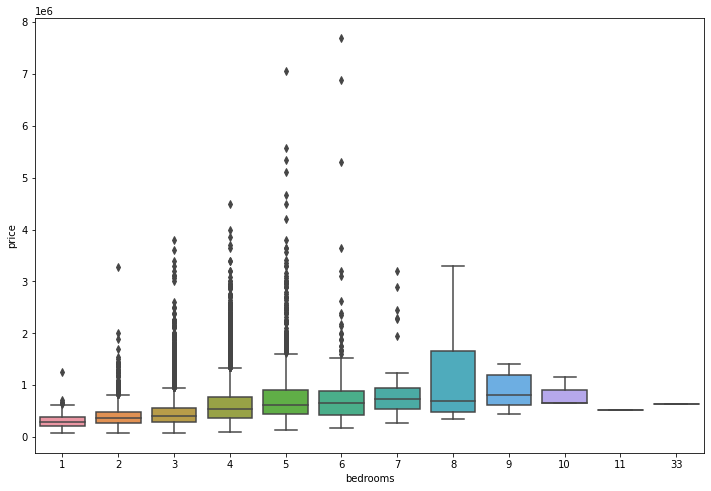

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

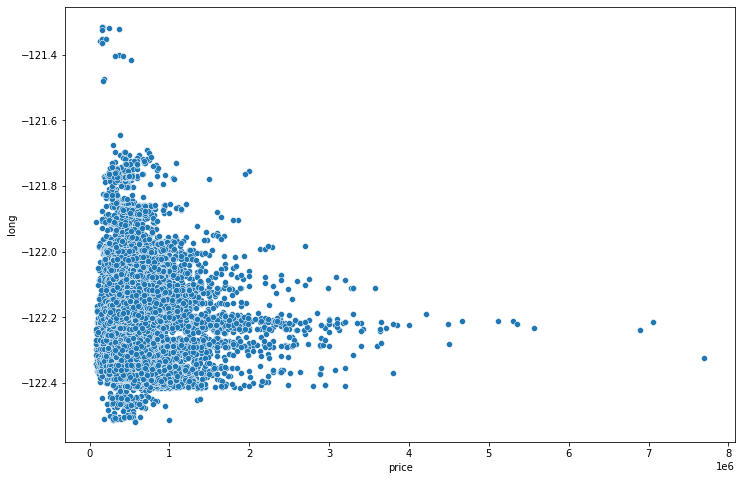

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

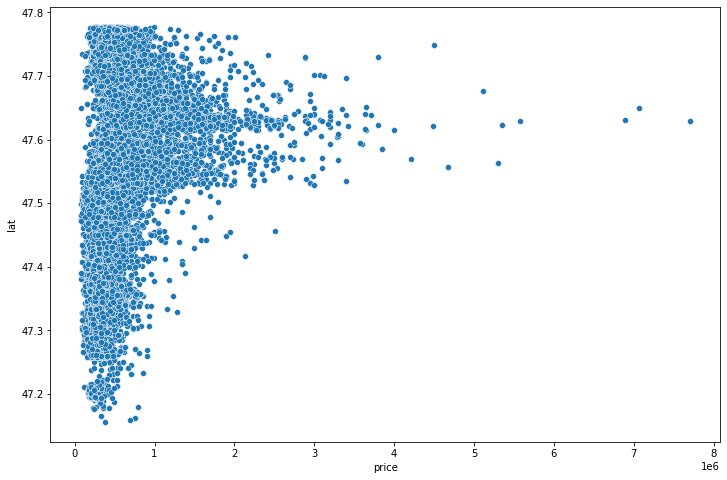

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

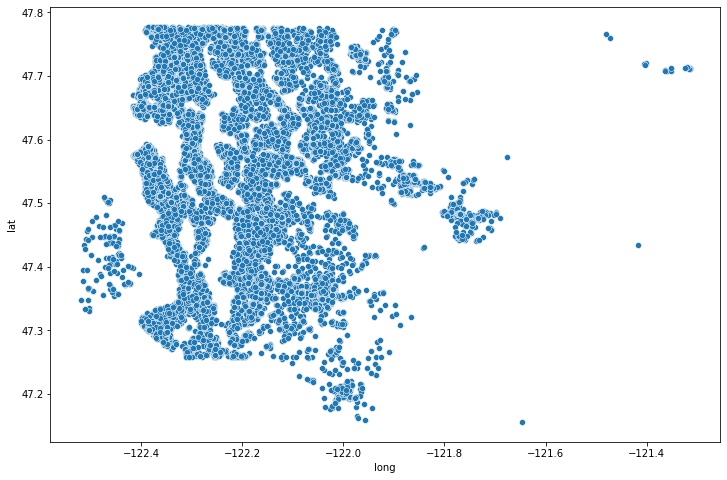

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

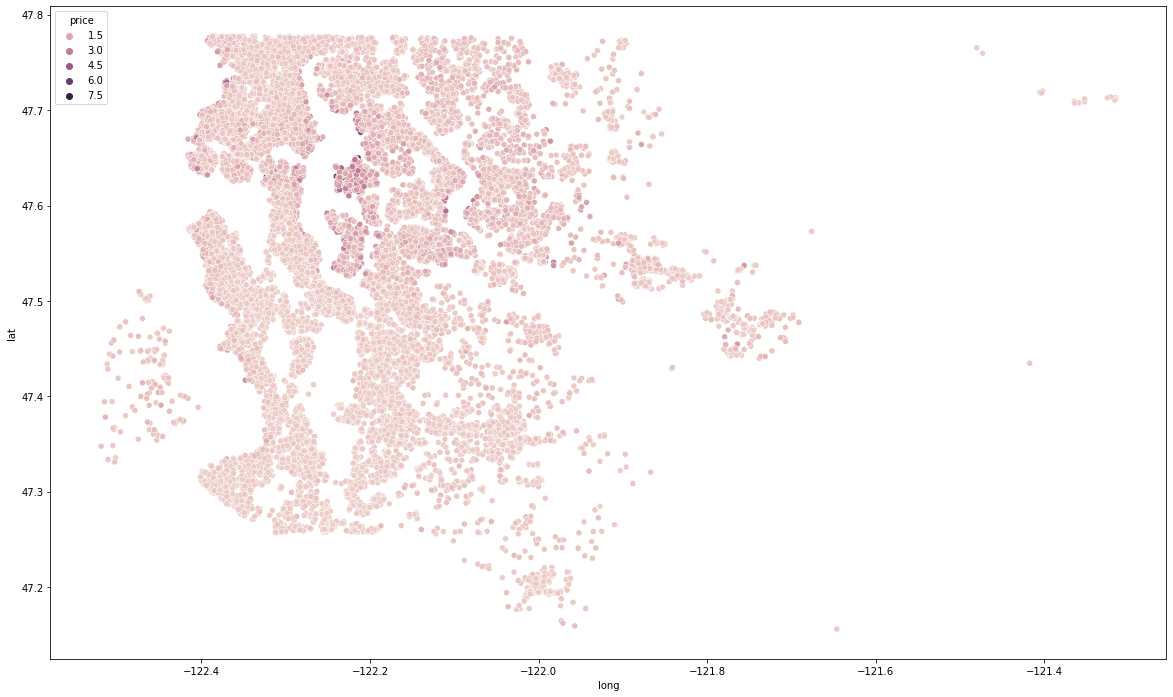

In [35]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [38]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [39]:
len(df)*(0.01)

215.97

In [40]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


<AxesSubplot:xlabel='long', ylabel='lat'>

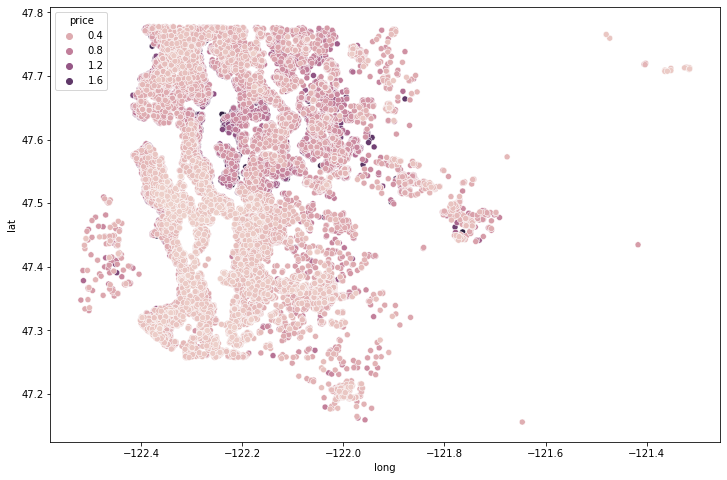

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

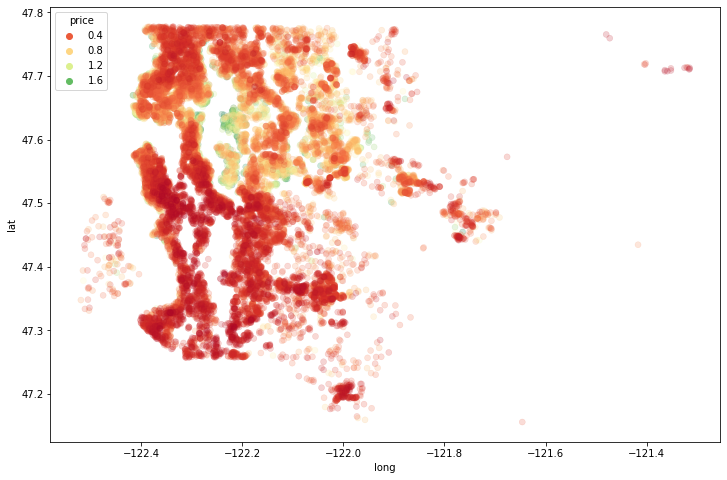

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

In [46]:
non_top_1_perc[non_top_1_perc['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


<AxesSubplot:xlabel='waterfront', ylabel='price'>

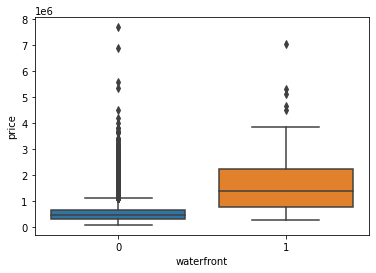

In [49]:
sns.boxplot(x='waterfront',y='price',data=df,)

In [50]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
df.drop('id',axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [53]:
df['date'] = pd.to_datetime(df['date'])

In [54]:
df['month'] = df['date'].apply(lambda date:date.month)

In [55]:
df['year'] = df['date'].apply(lambda date:date.year)

In [56]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='month', ylabel='price'>

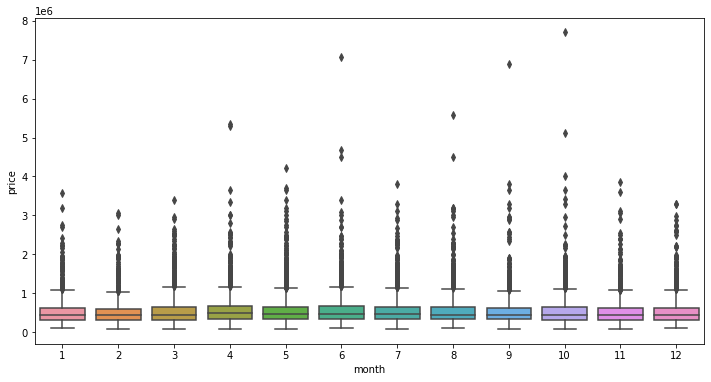

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month',y='price',data=df)

In [61]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

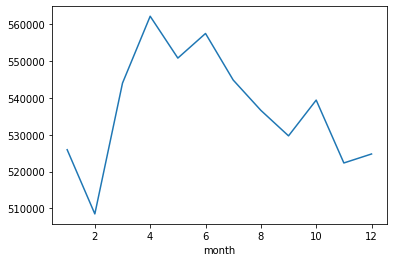

In [63]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

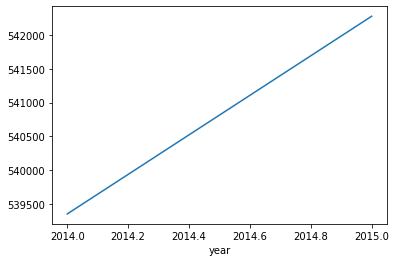

In [64]:
df.groupby('year').mean()['price'].plot()

In [65]:
df.drop('date',axis=1,inplace=True)

In [66]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [67]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [68]:
df = df.drop('zipcode',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [69]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [70]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [76]:
df.drop(df.index[df['bedrooms'] == 33], inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  int64  
 7   view           21596 non-null  int64  
 8   condition      21596 non-null  int64  
 9   grade          21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  int64  
 12  yr_built       21596 non-null  int64  
 13  yr_renovated   21596 non-null  int64  
 14  lat            21596 non-null  float64
 15  long           21596 non-null  float64
 16  sqft_living15  21596 non-null  int64  
 17  sqft_lot15     21596 non-null  int64  
 18  month 

In [81]:
X = df.drop('price',axis=1).values

y = df.price.values

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [85]:
X_train = scaler.fit_transform(X_train)

In [86]:
X_test = scaler.transform(X_test)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [92]:
X_train.shape

(15117, 19)

In [95]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [96]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 6ms/step - loss: 427099357184.0000 - val_loss: 426161897472.0000
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 425035628544.0000 - val_loss: 418943270912.0000
Epoch 3/400
119/119 [==============================] - 1s 4ms/step - loss: 397519585280.0000 - val_loss: 357304958976.0000
Epoch 4/400
119/119 [==============================] - 1s 4ms/step - loss: 280447746048.0000 - val_loss: 188334653440.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 128538443776.0000 - val_loss: 101944786944.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 98136694784.0000 - val_loss: 99078356992.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 95999475712.0000 - val_loss: 97204854784.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 94100594688.0000 - val_loss: 95207260160.0000
Epoch 9/400
119/119 [=

119/119 [==============================] - 0s 4ms/step - loss: 36341190656.0000 - val_loss: 36465451008.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 36201119744.0000 - val_loss: 36211113984.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 36020277248.0000 - val_loss: 36088205312.0000
Epoch 71/400
119/119 [==============================] - 0s 4ms/step - loss: 35879374848.0000 - val_loss: 35977457664.0000
Epoch 72/400
119/119 [==============================] - 0s 4ms/step - loss: 35772719104.0000 - val_loss: 35812003840.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 35626369024.0000 - val_loss: 35631071232.0000
Epoch 74/400
119/119 [==============================] - 0s 4ms/step - loss: 35510181888.0000 - val_loss: 35466829824.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 35353010176.0000 - val_loss: 35293884416.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 4ms/step - loss: 32184651776.0000 - val_loss: 31717517312.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32160241664.0000 - val_loss: 31656863744.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32137418752.0000 - val_loss: 31637032960.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32117211136.0000 - val_loss: 31600539648.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32073764864.0000 - val_loss: 31547457536.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32006195200.0000 - val_loss: 31558762496.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 31990812672.0000 - val_loss: 31471622144.0000
Epoch 142/400
119/119 [==============================] - 0s 4ms/step - loss: 31962626048.0000 - val_loss: 31423502336.0000
Epoch 143/400
11

119/119 [==============================] - 0s 4ms/step - loss: 30791055360.0000 - val_loss: 29972353024.0000
Epoch 202/400
119/119 [==============================] - 0s 4ms/step - loss: 30797588480.0000 - val_loss: 29895096320.0000
Epoch 203/400
119/119 [==============================] - 0s 4ms/step - loss: 30723119104.0000 - val_loss: 29910564864.0000
Epoch 204/400
119/119 [==============================] - 0s 4ms/step - loss: 30760024064.0000 - val_loss: 29893191680.0000
Epoch 205/400
119/119 [==============================] - 0s 4ms/step - loss: 30716801024.0000 - val_loss: 29845803008.0000
Epoch 206/400
119/119 [==============================] - 0s 4ms/step - loss: 30688419840.0000 - val_loss: 29916911616.0000
Epoch 207/400
119/119 [==============================] - 0s 4ms/step - loss: 30688290816.0000 - val_loss: 29793165312.0000
Epoch 208/400
119/119 [==============================] - 0s 4ms/step - loss: 30638147584.0000 - val_loss: 29804150784.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 29863636992.0000 - val_loss: 28896196608.0000
Epoch 268/400
119/119 [==============================] - 1s 5ms/step - loss: 29858500608.0000 - val_loss: 28874774528.0000
Epoch 269/400
119/119 [==============================] - 1s 6ms/step - loss: 29898596352.0000 - val_loss: 28893208576.0000
Epoch 270/400
119/119 [==============================] - 1s 5ms/step - loss: 29826760704.0000 - val_loss: 28910327808.0000
Epoch 271/400
119/119 [==============================] - 1s 6ms/step - loss: 29852645376.0000 - val_loss: 28882032640.0000
Epoch 272/400
119/119 [==============================] - 1s 5ms/step - loss: 29810432000.0000 - val_loss: 28858720256.0000
Epoch 273/400
119/119 [==============================] - 1s 5ms/step - loss: 29786961920.0000 - val_loss: 28837455872.0000
Epoch 274/400
119/119 [==============================] - 1s 5ms/step - loss: 29806843904.0000 - val_loss: 28834373632.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 29117347840.0000 - val_loss: 28151437312.0000
Epoch 334/400
119/119 [==============================] - 0s 4ms/step - loss: 29091352576.0000 - val_loss: 28128673792.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 29167308800.0000 - val_loss: 28111915008.0000
Epoch 336/400
119/119 [==============================] - 0s 4ms/step - loss: 29104191488.0000 - val_loss: 28069709824.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 29065519104.0000 - val_loss: 28061632512.0000
Epoch 338/400
119/119 [==============================] - 0s 4ms/step - loss: 29006254080.0000 - val_loss: 28089083904.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29093867520.0000 - val_loss: 28034342912.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29006469120.0000 - val_loss: 28021938176.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 28420280320.0000 - val_loss: 27371128832.0000
Epoch 400/400
119/119 [==============================] - 0s 4ms/step - loss: 28387020800.0000 - val_loss: 27354216448.0000


<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

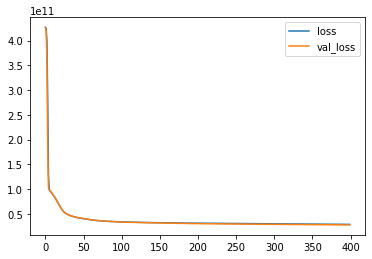

In [100]:
plt.figure(figsize=(12,8))
losses = pd.DataFrame(model.history.history)
losses.plot()

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [103]:
predictions = model.predict(X_test)

In [104]:
mean_absolute_error(y_test,predictions)

103405.63969410789

In [105]:
np.sqrt(mean_squared_error(y_test,predictions))

165391.09363917116

In [106]:
mean_squared_error(y_test,predictions)

27354213855.161083

In [107]:
df.price.describe()

count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [108]:
5.402920e+05

540292.0

In [109]:
explained_variance_score(y_test,predictions)

0.8002209046425686

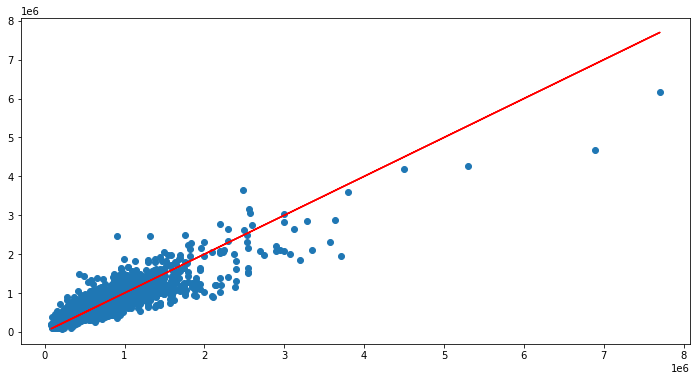

In [111]:
plt.figure(figsize=(12,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [112]:
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [113]:
single_house = df.drop('price',axis=1).iloc[0]

In [114]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [115]:
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.0030592 , 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.15304348, 0.0089114 , 0.81818182, 0.        ]])

In [116]:
model.predict(single_house)

array([[292295.34]], dtype=float32)

In [117]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64